## Titanic Challange

### 1. Introduction
The Titanic Challange dataset contains information on 891 of the passengers and crew members of Titanic. It includes one's personal information such as name, age, sex, or whether they have a family member on the ship or not. It also includes individuals' ticket class and fee, where they boarded from, their cabin, and whether they survived or not. The test data set contains the same information of 418 passengers as the training dataset except for the survival column.

The aim of this competition is to build a machine learning model to correctly predict whether the passengers in the test dataset will survive or not.

### 2. Data Overview

In [1]:
import pandas as pd #import pandas library

#import datasets
train = pd.read_csv(r"datasets\train.csv", skipinitialspace = True)
test = pd.read_csv(r"datasets\test.csv", skipinitialspace = True)

In [2]:
%%html 
<style> table {float:left} </style>

### 2.1 Data Dictionary

| Variable | Definition | Key |
| :- | -: | :-: |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd | 
| sex | Sex | 	
| Age | Age | in years | 
| sibsp | # of siblings / spouses aboard the Titanic |
| parch | # of parents / children aboard the Titanic |	
| ticket| Ticket number |
| fare| Passenger fare |
| cabin | Cabin number |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2.2 Train Dataset
The train data set including categorical and numerical attributes listed below, also there are some missing values in Age, Cabin, and Embarked column.

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.3 Test Dataset
The test data set contains the same features as the training dataset except for the Survived column. Here are some missing values in Age, Cabin, and Embarked column as well.

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 3. Visualization
In this step, some features in the dataset are visualized to have its effect on people's life. These features are ticket class, gender, age, the total number of siblings or spouses, the total number of parents or children, ticket fares, and embarked locations. After analyzing charts, it's seen that some columns can be used directly while others are needed to be manipulated by using feature engineering operations

In [7]:
import seaborn as sns #import seaborn library
import matplotlib.pyplot as plt #import matplotlib library
sns.set_style("whitegrid") #set default chart style

def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))
    
def line_chart(feature, min, max):
    facet = sns.FacetGrid(train, hue="Survived", aspect=4)
    facet.map(sns.kdeplot, feature, shade= True)
    facet.set(xlim=(min, max))
    facet.add_legend()
    plt.show()

### 3.1 Ticket Class

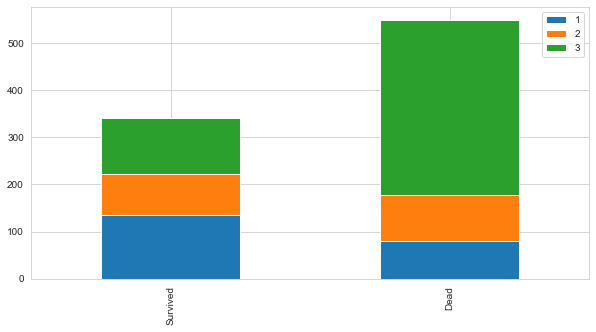

In [8]:
bar_chart('Pclass')

It can be seen from the first figure that first-class passengers are more likely to survive, and vice versa for the third class passengers. When the Titanic’s design is analyzed, it can be seen that third-class cabins are more close to the collision point. So, their chances to survive were much lower.

### 3.2 Sex

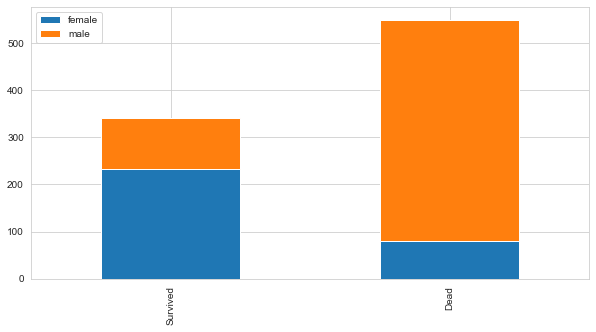

In [9]:
bar_chart('Sex')

For passenger's gender, female passengers are more likely to survive than others, since they were prioritized during the rescue. 

### 3.3 Age

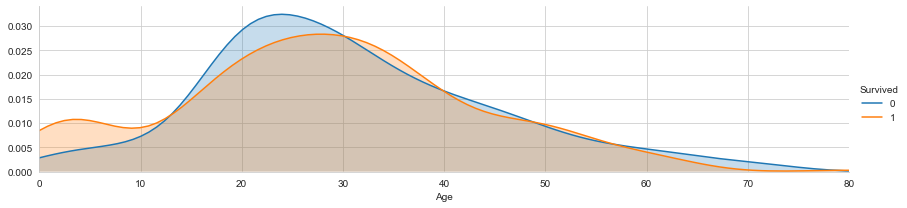

In [10]:
line_chart('Age', 0, train['Age'].max())

It can be interpreted that people younger than 15 are more likely to survive, while there is an opposite situation for people between 15 and 30. Also, people are older than 55 also less likely to survive. 

### 3.4 Number of Siblings or Spouses

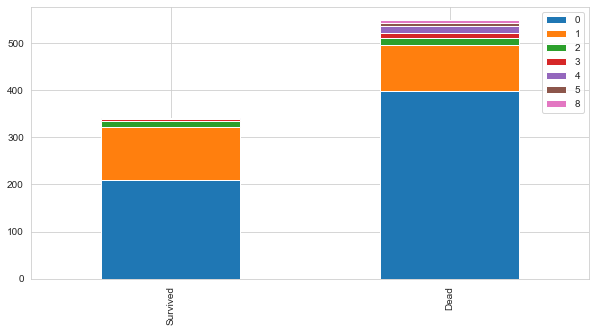

In [11]:
bar_chart('SibSp')

From the first figure, it can be interpreted that passengers without any siblings or spouse are more likely to die while the ones have more than 2 siblings or spouses are more likely to survive

### 3.5 Number of Parents or Children

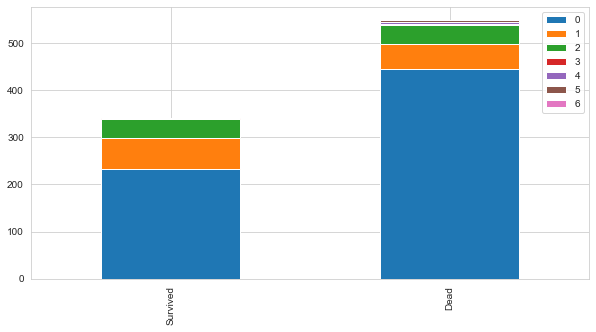

In [12]:
bar_chart('Parch')

This figure confirms that passengers without any parents or child are more likely to die and vice versa for the ones who have more than 2 relatives.

### 3.6 Fare

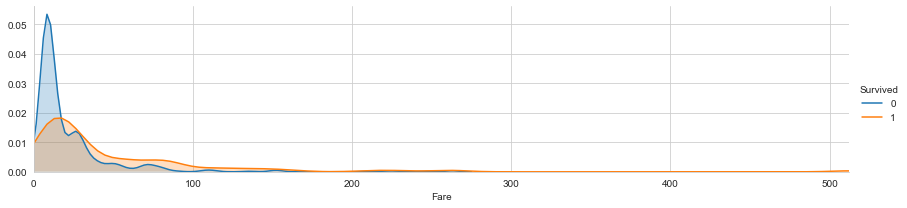

In [13]:
line_chart('Fare', 0, train['Fare'].max())

This figure confirms that people who have tickets with lower prices (probably thirdclass passengers) are less likely to survive than the ones with more expensive tickets.

### 3.7 Embarked

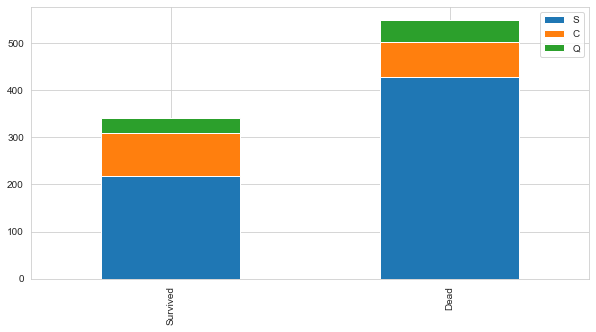

In [14]:
bar_chart('Embarked')

It can be interpreted that while people who are boarded from Southampton have less chance to survive, in contrast to people who are boarded from Queenstown.

### 4. Data Manipulation
In order to have better accuracy, missing data needs to be processed. And this will be done in 4 steps that are creating, completing, cleaning, and completing.

In [15]:
datasets = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.1  Completing and Creating
In the dataset, some values might be missing. Such as in the training data set, age and fare values are missing for the same values. These missing values can be completed by using different features. For instance, to fill missing age columns, the mean of the same Title group's age can be used. Or to complete missing Embarks, the most used port can be used as well. 

It is possible to create new features by using existing columns in order to use data more efficiently. For instance, names of the passengers are unique values and cannot be useful for classifying. But, there are some abbreviations such as Mr, Mrs, or Master that might be useful. To do this, these abbreviations will be transferred into a new column called Title, by using a regular expression referring to the words end with a period.

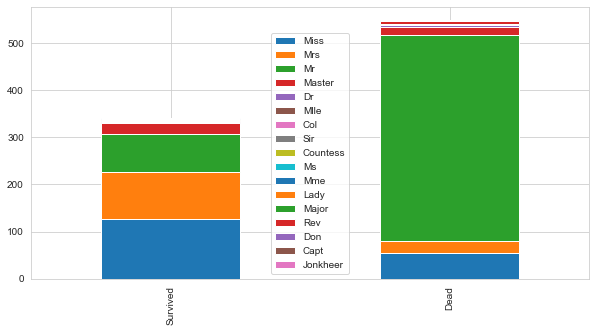

In [16]:
# Create Title from Name
for dataset in datasets:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

bar_chart("Title")

Age is a continuous numerical value that we cannot use directly. Instead, passengers can be divided into different groups such as children, teenagers, young, or old according to their ages.

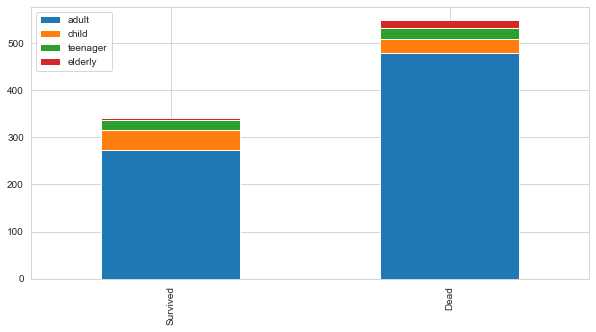

In [17]:
# Create AgeGroup from Age
bins = [0, 12, 17, 60, 999]
labels = ['child', 'teenager', 'adult', 'elderly']

for dataset in datasets:
    dataset["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
    dataset['AgeGroup'] = pd.cut(dataset.Age, bins, labels = labels)
    
bar_chart("AgeGroup")

Previous analysis indicates that the total number of children, parents, spouse, or siblings has a significant effect on surviving rate, but instead of it can be checked that whether the passenger is alone or not. Because passengers with no family have lower chances to survive.

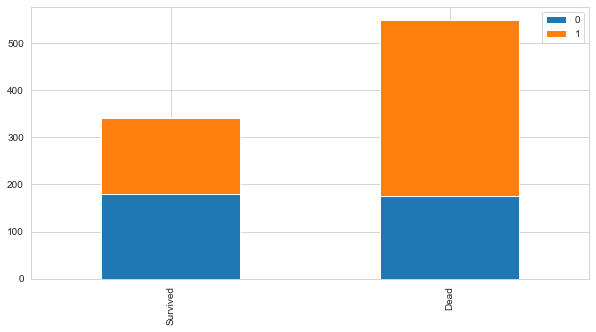

In [18]:
# Create Is Alone from SibSp and Parch
for dataset in datasets:
    dataset['IsAlone'] = 0
    dataset.loc[dataset["SibSp"] + dataset["Parch"] == 0, 'IsAlone'] = 1

bar_chart('IsAlone')

Fare is another continuous numerical value that can be divided into logical groups. And 4 different fare bands that have the similar possibilities to survive or die, can be created from this feature.

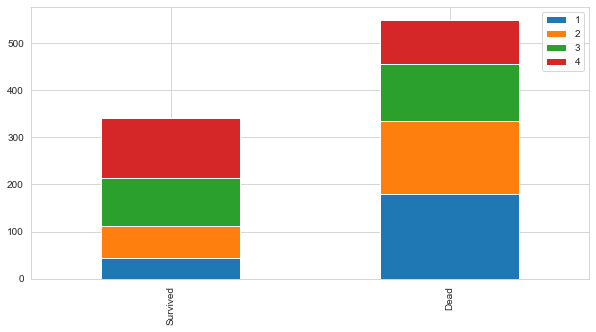

In [19]:
# Create FareBand from Fare
for dataset in datasets:
    dataset["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
    dataset['FareBand'] = pd.qcut(dataset['Fare'], 4, labels = [1, 2, 3, 4])
    
bar_chart("FareBand")

In [20]:
# Complete missing Embarked values
for dataset in datasets:
    dataset["Embarked"].fillna('S', inplace=True)

### 4.2 Cleaning
After creating required features from existing attributes, unnecessary columns can be removed in order to keep the data tidy and make the further processes simple and easier.

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,IsAlone,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,adult,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult,0,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult,0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult,1,2


Name, Age, SibSp, and Parch columns are already processed and no needed to exist anymore. Besides these, Ticket and Cabin features can be removed too. Ticket data includes alphanumerical unique values and doesn't seem to be useful during the KDD process. Also, the Cabin column has too many missing values and fare band and passenger class columns already cover it. So, these 7 features can be removed. And Passenger Id is not useful in training data either.

In [22]:
# Clean unnecessary columns
for dataset in datasets:
    dataset.drop('Name', axis=1, inplace=True)
    dataset.drop('Age', axis=1, inplace=True)
    dataset.drop('SibSp', axis=1, inplace=True)
    dataset.drop('Parch', axis=1, inplace=True)
    dataset.drop('Ticket', axis=1, inplace=True)
    dataset.drop('Fare', axis=1, inplace=True)
    dataset.drop('Cabin', axis=1, inplace=True)
train.drop('PassengerId', axis=1, inplace=True)

### 4.3 Converting
Machine classifiers cannot understand strings. All values needed to be numerical. For instance, instead of having groups like male and female, 0 and 1 should be used.

In [23]:
train.head()

,Survived,Pclass,Sex,Embarked,Title,AgeGroup,IsAlone,FareBand
0,0,3,male,S,Mr,adult,0,1
1,1,1,female,C,Mrs,adult,0,4
2,1,3,female,S,Miss,adult,1,2
3,1,1,female,S,Mrs,adult,0,4
4,0,3,male,S,Mr,adult,1,2


In [24]:
# Convert Sex column
s_map = {"male": 0, "female": 1}

for dataset in datasets:
    dataset['Sex'] = dataset['Sex'].map(s_map)

In [25]:
# Convert Embarked column
e_map = {"S": 0, "C": 1, "Q": 2}

for dataset in datasets:
    dataset['Embarked'] = dataset['Embarked'].map(e_map)

In [26]:
# Convert Title column
t_map = {"Capt": 0, "Col": 0, "Major": 0, "Dr": 0, "Rev": 0, "Jonkheer": 1, "Don": 1, "Sir": 1, "Countess": 1,
         "Lady": 1, "Mme":2, "Ms": 2, "Mrs": 2, "Mlle": 3, "Miss": 3, "Mr" : 4, "Master": 5}

for dataset in datasets:
    dataset['Title'] = dataset['Title'].map(t_map)

dataset["Title"].fillna(0, inplace=True)

In [27]:
# Convert Age column
s_map = {"child": 0, "teenager": 1, "adult": 2, "elderly": 3}

for dataset in datasets:
    dataset['AgeGroup'] = dataset['AgeGroup'].map(s_map)

After these steps, the SMV is ready to be used by machine classifiers in order to create models.

In [28]:
train.head()

,Survived,Pclass,Sex,Embarked,Title,AgeGroup,IsAlone,FareBand
0,0,3,0,0,4,2,0,1
1,1,1,1,1,2,2,0,4
2,1,3,1,0,3,2,1,2
3,1,1,1,0,2,2,0,4
4,0,3,0,0,4,2,1,2


### 5. Classification
In this step, different classifier algorithms will be used and the most accurate one will be selected to make predictions on the test data. To measure accuracy, the Cross-Validation method will be used. This method basically divides the training data into different groups (10 groups in this case), and will separate each group as test data, and applies the model that trained on the remaining groups. After doing this for all groups, the mean value can be used as accuracy score.

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

The following models will be used to create different models.
- Desicion Tree Classifier
- Random Forest Classifier
- Naive Bayes Classifier
- Support Vector Machine Classifier
- k-Nearest Neighbors Classifier
- Gradient Boosting Classifier
- Stochastic Gradient Descent Classifier
- Perceptron
- Logistic Regression

In [30]:
import numpy as np

train_data = train.drop('Survived', axis=1)
target = train['Survived']

accuracy = pd.DataFrame(columns = ["name", "score"])

def save_score(name,score):
    accuracy.loc[len(accuracy.index)] = [name, round(np.mean(score)*100, 2)]
    print(f"Accuracy: {round(np.mean(score)*100, 2)}")

In [31]:
# Desicion Tree Classifier
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(), train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
save_score("Desicion Tree Classifier", score)

Accuracy: 81.03


In [32]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

score = cross_val_score(RandomForestClassifier(n_estimators=13), train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
save_score("Random Forest Classifier", score)

Accuracy: 81.48


In [33]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

score = cross_val_score(GaussianNB(), train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
save_score("Naive Bayes Classifier", score)

Accuracy: 76.77


In [34]:
# Support Vector Machine Classifier
from sklearn.svm import SVC

score = cross_val_score(SVC(), train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
save_score("Support Vector Machine Classifier", score)

Accuracy: 80.7


In [35]:
#  k-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

score = cross_val_score(KNeighborsClassifier(n_neighbors = 13), train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
save_score("k-Nearest Neighbors Classifier", score)

Accuracy: 80.7


In [36]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

score = cross_val_score(GradientBoostingClassifier(), train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
save_score("Gradient Boosting Classifier", score)

Accuracy: 81.71


In [37]:
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

score = cross_val_score(SGDClassifier(), train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
save_score("Stochastic Gradient Descent Classifier", score)

Accuracy: 73.17


In [38]:
# Perceptron
from sklearn.linear_model import Perceptron

score = cross_val_score(Perceptron(), train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
save_score("Perceptron", score)

Accuracy: 70.14


In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

score = cross_val_score(LogisticRegression(), train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
save_score("Logistic Regression", score)

Accuracy: 79.57


Text(0, 0.5, '')

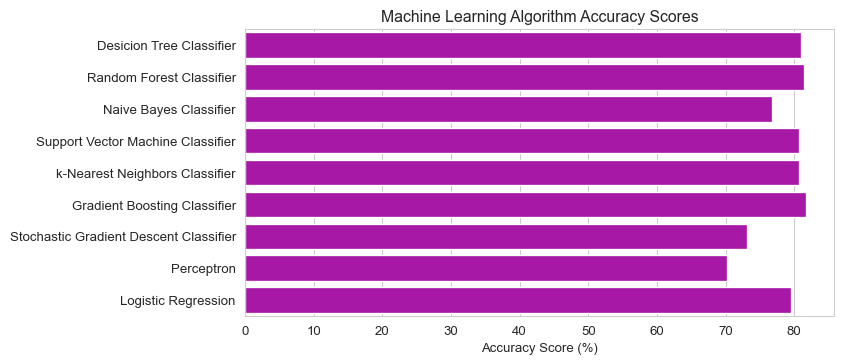

In [40]:
# Show Accuracy table
plt.figure(num=None, figsize=(8, 4), dpi=95, facecolor='w', edgecolor='k')
sns.barplot(x='score', y = 'name', data=accuracy, color = 'm')
plt.title('Machine Learning Algorithm Accuracy Scores')
plt.xlabel('Accuracy Score (%)')
plt.ylabel(None)

### 6. Testing

After trying different machine classifiers, Gradient Boosting Classifier is provided the highest accuracy and will be used to make predictions on the test data.

In [41]:
clf = GradientBoostingClassifier()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv("prediction-4.csv", index=False)

### 7. References

The following resources are used in this work.

- [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview)
- [Minsuk Heo - Titanic Challange](https://github.com/minsuk-heo/kaggle-titanic)
- [Titanic Survival Predictions (Beginner)](https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner/notebook)
- [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [Predict Titanic: 78.22% - in Progress](https://www.kaggle.com/guecoraph/predict-titanic-78-22-in-progress/notebook#Statistically-we-want-a-1-predictor-to-10-ratio-(1-to-ten))
- [Titanic EDA and Feature Engineering](https://www.kaggle.com/awwalmalhi/titanic-eda-and-feature-engineering)
- [Validating Machine Learning Models with scikit-learn](https://www.pluralsight.com/guides/validating-machine-learning-models-scikit-learn)
- [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/notebook)